By analysing the true and predicted labels as a graph, we can see which genres are mismatched the most.

For the network analysis, I'll use the NetworkX.

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import json


In [11]:
# Import the results of the model from experiments with comparison of Transformer models (https://github.com/TajaKuzman/Transformers-GINCO-Experiments) - the XMLRobertaLarge_run_1
y_true = ['News/Reporting', 'Opinionated News', 'Invitation', 'Other', 'Research Article', 'News/Reporting', 'Opinion/Argumentation', 'Opinionated News', 'Opinion/Argumentation', 'Opinionated News', 'Forum', 'Opinionated News', 'Correspondence', 'Correspondence', 'Information/Explanation', 'Correspondence', 'Opinionated News', 'Promotion', 'Information/Explanation', 'Information/Explanation', 'Invitation', 'Opinion/Argumentation', 'News/Reporting', 'Invitation', 'Information/Explanation', 'News/Reporting', 'News/Reporting', 'Information/Explanation', 'News/Reporting', 'Opinionated News', 'Instruction', 'Information/Explanation', 'Information/Explanation', 'News/Reporting', 'Promotion of a Product', 'Invitation', 'News/Reporting', 'Information/Explanation', 'Instruction', 'Information/Explanation', 'Instruction', 'Interview', 'Invitation', 'Promotion of a Product', 'Opinionated News', 'News/Reporting', 'Opinionated News', 'List of Summaries/Excerpts', 'Promotion of Services', 'List of Summaries/Excerpts', 'Information/Explanation', 'Forum', 'Promotion of a Product', 'Opinionated News', 'Opinion/Argumentation', 'Opinion/Argumentation', 'Information/Explanation', 'News/Reporting', 'Information/Explanation', 'Review', 'Opinion/Argumentation', 'Opinionated News', 'Opinion/Argumentation', 'Information/Explanation', 'Promotion of a Product', 'Promotion of a Product', 'Prose', 'Forum', 'List of Summaries/Excerpts', 'Information/Explanation', 'Information/Explanation', 'News/Reporting', 'List of Summaries/Excerpts', 'Promotion of Services', 'Opinionated News', 'Opinion/Argumentation', 'News/Reporting', 'News/Reporting', 'Other', 'Forum', 'Announcement', 'Information/Explanation', 'News/Reporting', 'Information/Explanation', 'Research Article', 'Information/Explanation', 'Opinion/Argumentation', 'Promotion of Services', 'Information/Explanation', 'List of Summaries/Excerpts', 'Forum', 'Correspondence', 'News/Reporting', 'Information/Explanation', 'Promotion', 'News/Reporting', 'Promotion', 'Correspondence', 'News/Reporting', 'Research Article', 'Research Article', 'Research Article', 'Instruction', 'Promotion of a Product', 'Announcement', 'List of Summaries/Excerpts', 'Instruction', 'Opinionated News', 'Promotion of a Product', 'Other', 'Information/Explanation', 'News/Reporting', 'Opinion/Argumentation', 'Legal/Regulation', 'Review', 'Opinionated News', 'Opinion/Argumentation', 'Interview', 'List of Summaries/Excerpts', 'Promotion of a Product', 'Information/Explanation', 'Promotion of a Product', 'List of Summaries/Excerpts', 'Opinion/Argumentation', 'Information/Explanation', 'Other', 'Promotion of Services', 'List of Summaries/Excerpts', 'Information/Explanation', 'News/Reporting', 'Promotion of a Product', 'Promotion', 'Information/Explanation', 'Promotion of a Product', 'News/Reporting', 'Invitation', 'Information/Explanation', 'Forum', 'Other', 'Review', 'List of Summaries/Excerpts', 'News/Reporting', 'Information/Explanation', 'Correspondence', 'Information/Explanation', 'Promotion of a Product', 'Announcement', 'Information/Explanation', 'Promotion of a Product', 'Opinion/Argumentation', 'List of Summaries/Excerpts', 'Forum', 'Promotion of a Product', 'List of Summaries/Excerpts', 'Forum', 'List of Summaries/Excerpts', 'Opinion/Argumentation', 'Opinionated News', 'List of Summaries/Excerpts', 'Opinion/Argumentation', 'Promotion of a Product', 'Forum', 'Promotion', 'Opinionated News', 'Opinionated News', 'Promotion of a Product', 'News/Reporting', 'Promotion of a Product', 'Call', 'Information/Explanation', 'Other', 'Promotion of a Product', 'Promotion of Services', 'Instruction', 'Opinionated News', 'News/Reporting', 'Information/Explanation', 'Promotion of a Product', 'Opinion/Argumentation', 'Information/Explanation', 'Recipe', 'Opinion/Argumentation', 'Other', 'News/Reporting', 'News/Reporting', 'Opinionated News', 'News/Reporting', 'Opinionated News', 'Opinionated News', 'News/Reporting', 'Forum', 'Invitation', 'Promotion of a Product', 'Information/Explanation', 'Announcement', 'List of Summaries/Excerpts', 'List of Summaries/Excerpts']

y_pred = ['Opinionated News', 'News/Reporting', 'Invitation', 'Other', 'Research Article', 'Opinionated News', 'Opinion/Argumentation', 'Opinionated News', 'Opinion/Argumentation', 'Opinionated News', 'Forum', 'Opinionated News', 'Correspondence', 'Forum', 'Information/Explanation', 'Review', 'News/Reporting', 'Promotion', 'Information/Explanation', 'Information/Explanation', 'Information/Explanation', 'Opinion/Argumentation', 'Opinionated News', 'Invitation', 'Information/Explanation', 'Opinionated News', 'Opinionated News', 'Information/Explanation', 'News/Reporting', 'Opinion/Argumentation', 'Instruction', 'Information/Explanation', 'Information/Explanation', 'News/Reporting', 'Promotion of a Product', 'Promotion of a Product', 'News/Reporting', 'Opinion/Argumentation', 'Other', 'Call', 'Announcement', 'Opinion/Argumentation', 'Invitation', 'Information/Explanation', 'Opinionated News', 'News/Reporting', 'News/Reporting', 'List of Summaries/Excerpts', 'Promotion', 'Promotion of Services', 'Invitation', 'Review', 'Promotion of a Product', 'News/Reporting', 'Opinion/Argumentation', 'Opinionated News', 'Information/Explanation', 'News/Reporting', 'News/Reporting', 'Review', 'Opinion/Argumentation', 'Opinionated News', 'Opinion/Argumentation', 'Information/Explanation', 'Promotion of a Product', 'Information/Explanation', 'Opinion/Argumentation', 'Forum', 'Other', 'Information/Explanation', 'Invitation', 'News/Reporting', 'Opinion/Argumentation', 'Promotion', 'News/Reporting', 'Promotion of a Product', 'News/Reporting', 'News/Reporting', 'Other', 'Forum', 'List of Summaries/Excerpts', 'Information/Explanation', 'News/Reporting', 'Information/Explanation', 'Information/Explanation', 'Information/Explanation', 'Information/Explanation', 'Promotion of a Product', 'Information/Explanation', 'List of Summaries/Excerpts', 'Forum', 'Correspondence', 'News/Reporting', 'Information/Explanation', 'Opinion/Argumentation', 'News/Reporting', 'Promotion', 'Correspondence', 'News/Reporting', 'Information/Explanation', 'Research Article', 'Information/Explanation', 'Instruction', 'News/Reporting', 'Invitation', 'Promotion of a Product', 'Other', 'Opinionated News', 'Promotion of a Product', 'News/Reporting', 'Information/Explanation', 'News/Reporting', 'Opinion/Argumentation', 'Legal/Regulation', 'Review', 'Opinionated News', 'Opinion/Argumentation', 'Interview', 'List of Summaries/Excerpts', 'Promotion of a Product', 'Other', 'Promotion of a Product', 'News/Reporting', 'Opinion/Argumentation', 'Information/Explanation', 'Opinion/Argumentation', 'Promotion of Services', 'List of Summaries/Excerpts', 'Information/Explanation', 'News/Reporting', 'Promotion of a Product', 'Promotion of a Product', 'Information/Explanation', 'Promotion of a Product', 'Invitation', 'Opinionated News', 'Promotion of a Product', 'Forum', 'Prose', 'Opinion/Argumentation', 'Opinion/Argumentation', 'News/Reporting', 'News/Reporting', 'Correspondence', 'Information/Explanation', 'Promotion of a Product', 'Announcement', 'Other', 'Promotion of a Product', 'Other', 'List of Summaries/Excerpts', 'Forum', 'Promotion of a Product', 'List of Summaries/Excerpts', 'Forum', 'List of Summaries/Excerpts', 'News/Reporting', 'Opinionated News', 'List of Summaries/Excerpts', 'Opinionated News', 'Promotion of a Product', 'Correspondence', 'Promotion of a Product', 'Opinionated News', 'Opinionated News', 'Promotion of a Product', 'News/Reporting', 'Promotion of a Product', 'Call', 'Promotion of a Product', 'Information/Explanation', 'Promotion of a Product', 'Promotion of Services', 'Instruction', 'News/Reporting', 'News/Reporting', 'Information/Explanation', 'Promotion of a Product', 'News/Reporting', 'Information/Explanation', 'Recipe', 'Promotion', 'Instruction', 'News/Reporting', 'Opinionated News', 'Opinion/Argumentation', 'News/Reporting', 'Opinionated News', 'Opinionated News', 'News/Reporting', 'Forum', 'Invitation', 'Information/Explanation', 'Invitation', 'Announcement', 'Promotion of Services', 'Invitation']

In [12]:
# Create a dataframe
df = pd.DataFrame({"Source": y_true, "Target": y_pred})

df

,Source,Target
0,News/Reporting,Opinionated News
1,Opinionated News,News/Reporting
2,Invitation,Invitation
3,Other,Other
4,Research Article,Research Article
...,...,...
192,Promotion of a Product,Information/Explanation
193,Information/Explanation,Invitation
194,Announcement,Announcement
195,List of Summaries/Excerpts,Promotion of Services


In [25]:
sl_ginco_core_df

,Source,Target,agreement
0,News,News,nan
1,News,Promotion,no
2,News,News,nan
3,News,News,nan
4,Information/Explanation,Opinion/Argumentation,no
...,...,...,...
20347,Opinion/Argumentation,Opinion/Argumentation,nan
20348,Opinion/Argumentation,Information/Explanation,no
20349,Information/Explanation,Opinion/Argumentation,no
20350,Opinion/Argumentation,Instruction,no


In [19]:
def label_graph(sl_df):
	"""
	Args:
	- sl_df (DataFrame): DataFrame with nodes in columns "Source" and "Target"
	"""
	# Find columns where the nodes are connected to themselves
	sl_df['agreement'] = np.where((sl_df['Source'] == sl_df['Target']), np.nan, "no")

	# Discard columns with agreement
	sl_df = sl_df[sl_df["agreement"] == "no"]

	# Calculate the edge weight (number of occurences of the same pair)
	sl_df['weight'] = sl_df.groupby(['Source', 'Target'])['Source'].transform('size')

	# Normalize the weight and make it a bit larger
	sl_df['weight'] = (sl_df['weight'] - sl_df['weight'].min()) / (sl_df['weight'].max() - sl_df['weight'].min()) *10   
  

	# Load df as a networkx graph
	sl_G = nx.from_pandas_edgelist(sl_df, source="Source", target="Target", edge_attr="weight", create_using=nx.DiGraph())

	widths = nx.get_edge_attributes(sl_G, 'weight')
	nodelist =sl_G.nodes()

	d = dict(sl_G.degree)

	plt.figure(figsize=(15,15))

	# Choose the layout
	pos = nx.shell_layout(sl_G)
	nx.draw_networkx_nodes(sl_G,pos,
						nodelist=nodelist,
						#node_size =1000,
						node_color = "lightblue",
						node_size=[v * 100 for v in d.values()]
						)
	nx.draw_networkx_edges(sl_G,pos,
						edgelist = widths.keys(),
						width=list(widths.values()),
						edge_color="blue", 
						alpha=0.6,
						arrows = True,
						#arrowstyle="->",
    					#arrowsize=30,
						)
	nx.draw_networkx_labels(sl_G, pos=pos,
							labels=dict(zip(nodelist,nodelist)),
							font_size = 12,
							)
	plt.box(False)
	plt.show()
		

C:\Users\TajaK\AppData\Local\Temp\ipykernel_4144\3958832240.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_df['weight'] = sl_df.groupby(['Source', 'Target'])['Source'].transform('size')
C:\Users\TajaK\AppData\Local\Temp\ipykernel_4144\3958832240.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_df['weight'] = (sl_df['weight'] - sl_df['weight'].min()) / (sl_df['weight'].max() - sl_df['weight'].min()) *10


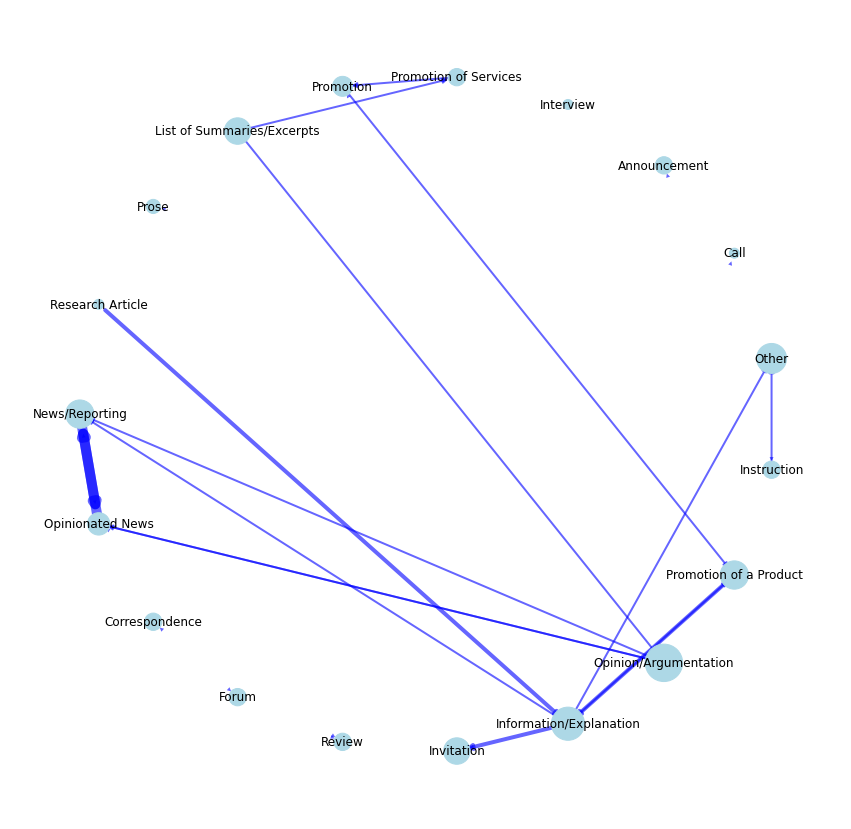

In [20]:
label_graph(df)